# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [313]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import scipy.stats as st
%matplotlib notebook
%matplotlib inline
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID", how = "right")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [314]:
# Checking the number of mice.
combined_df['Mouse ID'].nunique()

249

In [315]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_id = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
dupe_id

array(['g989'], dtype=object)

In [316]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes_df = combined_df.loc[combined_df["Mouse ID"] == "g989",:]
dupes_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0


In [317]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = pd.concat([combined_df,dupes_df]).drop_duplicates(keep=False) # code from https://stackoverflow.com/questions/37313691/how-to-remove-a-pandas-dataframe-from-another-dataframe by piRSquared
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [318]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [319]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_df = pd.DataFrame({"mean":tumor_mean,
                         "median":tumor_median,
                         "var":tumor_variance,
                         "std":tumor_std,
                         "sem":tumor_sem})
tumor_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [320]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
aggregate_df=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
# Using the aggregation method, produce the same summary statistics in a single line
aggregate_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

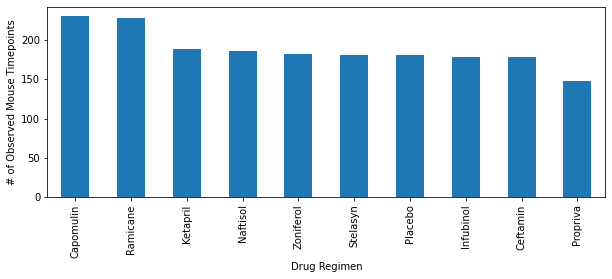

In [321]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_pandas = clean_df["Drug Regimen"].value_counts().plot(kind = "bar",figsize=(10,3.5))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

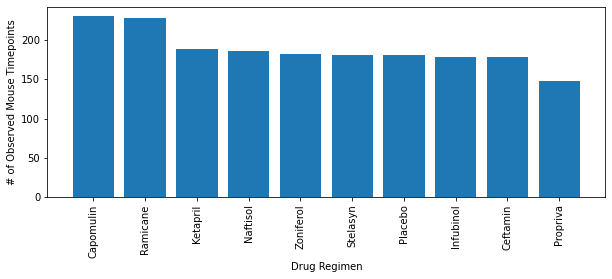

In [322]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_points = clean_df["Drug Regimen"].unique()
x_axis = np.arange(len(mouse_points))
tick_locations = [value for value in x_axis]

y_values = clean_df["Drug Regimen"].value_counts()
index= ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo","Infubinol","Ceftamin","Propriva"]

plt.figure(figsize=(10,3.5))
plt.bar(tick_locations,y_values)
plt.xticks(tick_locations, index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

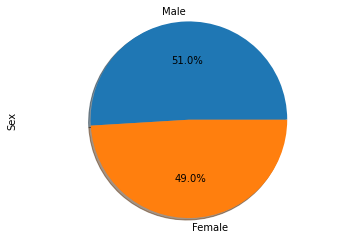

In [323]:
# Generate a pie plot showing the distribution of female versus male miceusing Pandas
sex_pandas = clean_df["Sex"].value_counts().plot(kind = "pie",autopct="%1.1f%%",shadow=True)
plt.axis("equal")
plt.show()

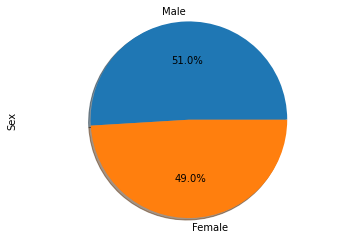

In [324]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]

mouse_sex = clean_df["Sex"].value_counts()
plt.pie(mouse_sex,labels=labels,autopct="%1.1f%%", shadow=True)
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [325]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol"]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capo_merge = pd.merge(Capomulin_last,clean_df,on=("Mouse ID","Timepoint"))
Rami_merge = pd.merge(Ramicane_last,clean_df,on=("Mouse ID","Timepoint"))
Infu_merge = pd.merge(Infubinol_last,clean_df,on=("Mouse ID","Timepoint"))
Ceft_merge = pd.merge(Ceftamin_last,clean_df,on=("Mouse ID","Timepoint"))

In [326]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [Capo_merge,Rami_merge,Infu_merge,Ceft_merge]
labels = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
x_tumors = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatments:
    tumors = x["Tumor Volume (mm3)"]
    quartiles = tumors.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    drug = x["Drug Regimen"][0]
    # Locate the rows which contain mice on each drug and get the tumor volumes
     
    print(f"Lower Quartile of {drug}: {lowerq} mm3")
    print(f"Upper Quartile of {drug}: {upperq} mm3")
    print(f"Inter Quartile Range of {drug}: {iqr} mm3")
    print(f"Median of {drug}: {quartiles[0.5]} mm3")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.\n")

    x_tumors.append(tumors)
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


Lower Quartile of Capomulin: 32.37735684 mm3
Upper Quartile of Capomulin: 40.1592203 mm3
Inter Quartile Range of Capomulin: 7.781863460000004 mm3
Median of Capomulin: 38.1251644 mm3
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Lower Quartile of Ramicane: 31.56046955 mm3
Upper Quartile of Ramicane: 40.65900627 mm3
Inter Quartile Range of Ramicane: 9.098536719999998 mm3
Median of Ramicane: 36.56165229 mm3
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Lower Quartile of Infubinol: 54.04860769 mm3
Upper Quartile of Infubinol: 65.52574285 mm3
Inter Quartile Range of Infubinol: 11.477135160000003 mm3
Median of Infubinol: 60.16518046 mm3
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Lower Quartile of Ceftamin: 48.72207785 mm3
Upper Quartile of Ceftamin: 64.29983003 mm3
Inter Quartile Range of Ceftamin: 15.577752179999997 mm3
Median of Ceftam

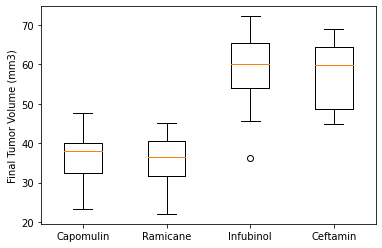

In [327]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
drug_tumors = [Capo_merge["Tumor Volume (mm3)"],
               Rami_merge["Tumor Volume (mm3)"],
               Infu_merge["Tumor Volume (mm3)"],
               Ceft_merge["Tumor Volume (mm3)"]]
drugs = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(drug_tumors, labels=drugs)
plt.show()

## Line and Scatter Plots

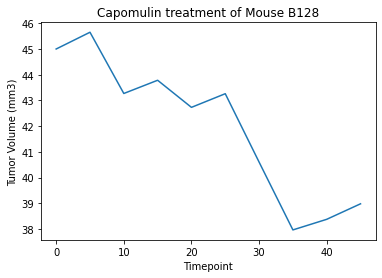

In [328]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
drug_regimen = clean_df.set_index("Drug Regimen")
capomulin = drug_regimen.loc["Capomulin",:]
capomulin_b128 = capomulin.loc[capomulin["Mouse ID"] == "b128",:]


plt.plot(capomulin_b128["Timepoint"],capomulin_b128["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of Mouse B128")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.show()

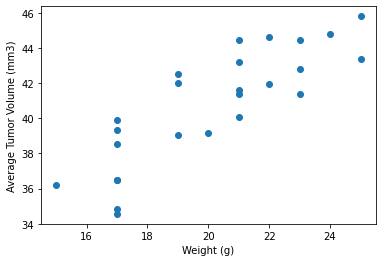

In [329]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_tumor_avg = capomulin.groupby(["Mouse ID"]).mean()

plt.scatter(capomulin_tumor_avg["Weight (g)"],capomulin_tumor_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.7088568047708723
y = 0.95x + 21.55


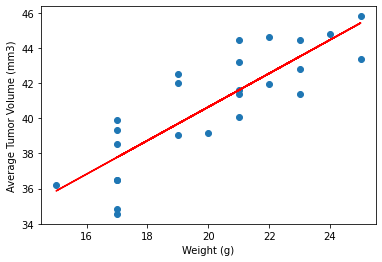

In [330]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = capomulin_tumor_avg["Weight (g)"]
y_values = capomulin_tumor_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(capomulin_tumor_avg["Weight (g)"],capomulin_tumor_avg["Tumor Volume (mm3)"])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The correlation between mouse weight and the average tumor volume is: {rvalue**2}")
print(line_eq)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()